In [56]:
# 将训练集，测试集和验证集按时间序列（单位：小时）排好 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import scipy.io as sio
import numpy as np

data = sio.loadmat('processed_data_dict.mat')
user_id = 0
load_all = 1
train_load = 2
val_load = 3
test_load = 4
exist_load = 5

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

train_time_series = {}
for district in data:
    if district.startswith('__'):
        continue
    district_data = data[district]
    l_data = np.array([user[train_load] for user in district_data])
    print(l_data.shape)
    num_users, num_hours, num_days = l_data.shape
    transformed_l_data = np.zeros((num_users, num_hours * num_days))
    for i in range(num_users):
         for j in range(num_days):
            for k in range(num_hours):
                transformed_l_data[i, j * num_hours + k] = l_data[i, k, j]
                train_time_series[district] = transformed_l_data    
    transformed_l_data = np.array(transformed_l_data)
    print(transformed_l_data.shape)     
    train_time_series[district] = transformed_l_data

val_time_series = {}
for district in data:
    if district.startswith('__'):
        continue
    district_data = data[district]
    v_data = np.array([user[val_load] for user in district_data])
    print(v_data.shape)
    num_users, num_hours, num_days = v_data.shape
    transformed_v_data = np.zeros((num_users, num_hours * num_days))
    for i in range(num_users):
         for j in range(num_days):
            for k in range(num_hours):
                transformed_v_data[i, j * num_hours + k] = v_data[i, k, j]
                val_time_series[district] = transformed_v_data    
    transformed_v_data = np.array(transformed_v_data)
    print(transformed_v_data.shape)     
    val_time_series[district] = transformed_v_data

test_time_series = {}
for district in data:
    if district.startswith('__'):
        continue
    district_data = data[district]
    t_data = np.array([user[test_load] for user in district_data])
    print(t_data.shape)
    num_users, num_hours, num_days = t_data.shape
    transformed_t_data = np.zeros((num_users, num_hours * num_days))
    for i in range(num_users):
         for j in range(num_days):
            for k in range(num_hours):
                transformed_t_data[i, j * num_hours + k] = t_data[i, k, j]
                test_time_series[district] = transformed_t_data    
    transformed_t_data = np.array(transformed_t_data)
    print(transformed_t_data.shape)     
    test_time_series[district] = transformed_t_data
print(test_time_series['A_user_data'])


(711, 24, 120)
(711, 2880)
(473, 24, 120)
(473, 2880)
(584, 24, 120)
(584, 2880)
(708, 24, 120)
(708, 2880)
(174, 24, 120)
(174, 2880)
(1000, 24, 120)
(1000, 2880)
(2650, 24, 120)
(2650, 2880)
(711, 24, 15)
(711, 360)
(473, 24, 15)
(473, 360)
(584, 24, 15)
(584, 360)
(708, 24, 15)
(708, 360)
(174, 24, 15)
(174, 360)
(1000, 24, 15)
(1000, 360)
(2650, 24, 15)
(2650, 360)
(711, 24, 15)
(711, 360)
(473, 24, 15)
(473, 360)
(584, 24, 15)
(584, 360)
(708, 24, 15)
(708, 360)
(174, 24, 15)
(174, 360)
(1000, 24, 15)
(1000, 360)
(2650, 24, 15)
(2650, 360)
[[0.2345 0.1205 0.118  ... 1.242  1.083  1.0395]
 [0.488  0.4155 0.2585 ... 0.741  0.678  0.3555]
 [0.415  0.315  0.89   ... 1.152  0.91   0.6785]
 ...
 [0.6025 0.395  0.3645 ... 2.233  2.0965 1.907 ]
 [0.608  0.2165 0.1895 ... 1.038  0.9225 0.8295]
 [0.217  0.255  0.2565 ... 0.758  0.4865 0.246 ]]


In [57]:

# 对用户数维度加和，归一化
scaler = MinMaxScaler(feature_range=(0, 1))
for district in train_time_series:
        train_time_series[district] = np.sum(train_time_series[district],axis=0)
        train_time_series[district] = scaler.fit_transform(train_time_series[district].reshape(-1,1))
        print(train_time_series[district].shape)
#print(train_time_series['A_user_data'])
for district in val_time_series:
        val_time_series[district] = np.sum(val_time_series[district],axis=0)
        val_time_series[district] = scaler.fit_transform(val_time_series[district].reshape(-1,1))
        print(val_time_series[district].shape)
#print(val_time_series['A_user_data'])
for district in test_time_series:
        test_time_series[district] = np.sum(test_time_series[district],axis=0)
        test_time_series[district] = scaler.fit_transform(test_time_series[district].reshape(-1,1))
        print(test_time_series[district].shape)
#print(test_time_series['A_user_data'])

(2880, 1)
(2880, 1)
(2880, 1)
(2880, 1)
(2880, 1)
(2880, 1)
(2880, 1)
(360, 1)
(360, 1)
(360, 1)
(360, 1)
(360, 1)
(360, 1)
(360, 1)
(360, 1)
(360, 1)
(360, 1)
(360, 1)
(360, 1)
(360, 1)
(360, 1)


In [58]:

# 对A小区分特征与标签，时间步设为24*3，特征为1，预测后4个小时的数据
x_train = []
y_train = []
for i in np.arange(24*3,len(train_time_series['A_user_data'])-4):
    x_train.append(train_time_series['A_user_data'][i-24*3:i,:])
    y_train.append(train_time_series['A_user_data'][i:i+4].flatten())
x_train = np.array(x_train)
y_train = np.array(y_train)
print(x_train.shape)
print(y_train.shape)



x_val = []
y_val = []
for i in np.arange(24*3,len(val_time_series['A_user_data'])-4):
    x_val.append(train_time_series['A_user_data'][i-24*3:i,:])
    y_val.append(train_time_series['A_user_data'][i:i+4].flatten())
x_val = np.array(x_val)
y_val = np.array(y_val)
print(x_val.shape)
print(y_val.shape)

x_test = []
y_test = []
for i in np.arange(24*3,len(test_time_series['A_user_data'])-4):
    x_test.append(test_time_series['A_user_data'][i-24*3:i,:])
    y_test.append(test_time_series['A_user_data'][i:i+4].flatten())
x_test = np.array(x_test)
y_test = np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(2804, 72, 1)
(2804, 4)
(284, 72, 1)
(284, 4)
(284, 72, 1)
(284, 4)


In [59]:
import torch

x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

x_val_tensor = torch.tensor(x_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)

x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

print(x_train_tensor.shape)
print(y_train_tensor.shape)
print(x_val_tensor.shape)
print(y_val_tensor.shape)
print(x_test_tensor.shape)
print(y_test_tensor.shape)

torch.Size([2804, 72, 1])
torch.Size([2804, 4])
torch.Size([284, 72, 1])
torch.Size([284, 4])
torch.Size([284, 72, 1])
torch.Size([284, 4])


In [60]:
from torch.utils.data import DataLoader, TensorDataset

batch_size = 32

train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
val_dataset = TensorDataset(x_val_tensor, y_val_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [61]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from utils import *
from Network import *

%matplotlib inline
import matplotlib.pyplot as plt

#hyperparams
enc_seq_len = 6
dec_seq_len = 2
output_sequence_length = 4

dim_val = 10
dim_attn = 5
lr = 0.002
epochs = 800

n_heads = 3 

n_decoder_layers = 3
n_encoder_layers = 3

batch_size = 32

#init network and optimizer
new_var = 1
t = Transformer(dim_val, dim_attn, new_var,dec_seq_len,  output_sequence_length, n_decoder_layers, n_encoder_layers, n_heads)
optimizer = torch.optim.Adam(t.parameters(), lr=lr)

#keep track of loss for graph
criterion = nn.MSELoss()

train_losses = []
val_losses = []

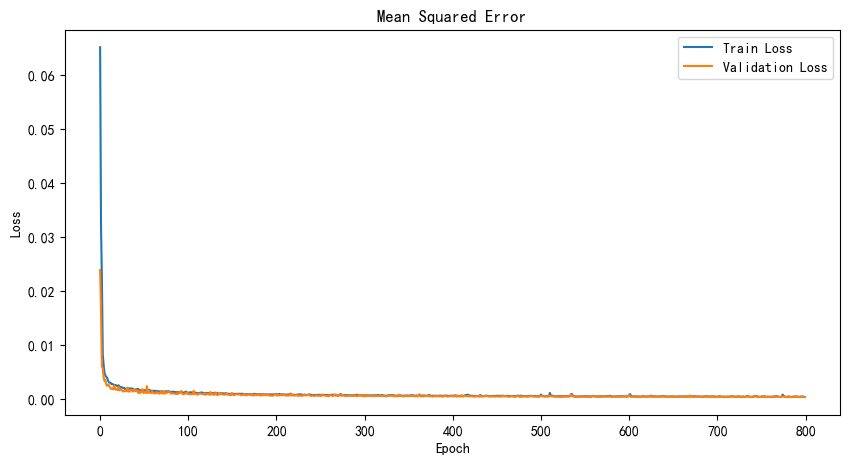

In [62]:
best_val_loss = float('inf')
transfomer_best = 'transfomer_best.pth'

for e in range(epochs):
    t.train()
    epoch_train_loss = 0
    
    for X, Y in train_loader:
        optimizer.zero_grad()
        
        # 前向传播
        net_out = t(X)
        #print(net_out.shape)
        #print(Y.shape)

        # 计算损失
        loss = criterion(net_out, Y)
        
        # 反向传播
        loss.backward()
        optimizer.step()
        
        epoch_train_loss += loss.item()
    
    avg_train_loss = epoch_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    
    # 验证过程
    t.eval()
    epoch_val_loss = 0
    
    with torch.no_grad():
        for X_val, Y_val in val_loader:
            val_out = t(X_val)
            val_loss = criterion(val_out, Y_val)
            epoch_val_loss += val_loss.item()
    
    avg_val_loss = epoch_val_loss / len(val_loader)
    val_losses.append(avg_val_loss)
    
    # 保存效果最好的模型
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        torch.save(t.state_dict(), transfomer_best)
        
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title("Mean Squared Error")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [66]:

t.load_state_dict(torch.load(transfomer_best))
t.eval()

test_loss = 0
predictions = []
actuals = []

with torch.no_grad():
    for X_test, Y_test in test_loader:
        test_out = t(X_test)
        predictions.append(test_out.numpy())
        actuals.append(Y_test.numpy())
        loss = criterion(test_out, Y_test)
        test_loss += loss.item()

avg_test_loss = test_loss / len(test_loader)
print(f"Test Loss: {avg_test_loss}")


Test Loss: 0.0020999040377015867


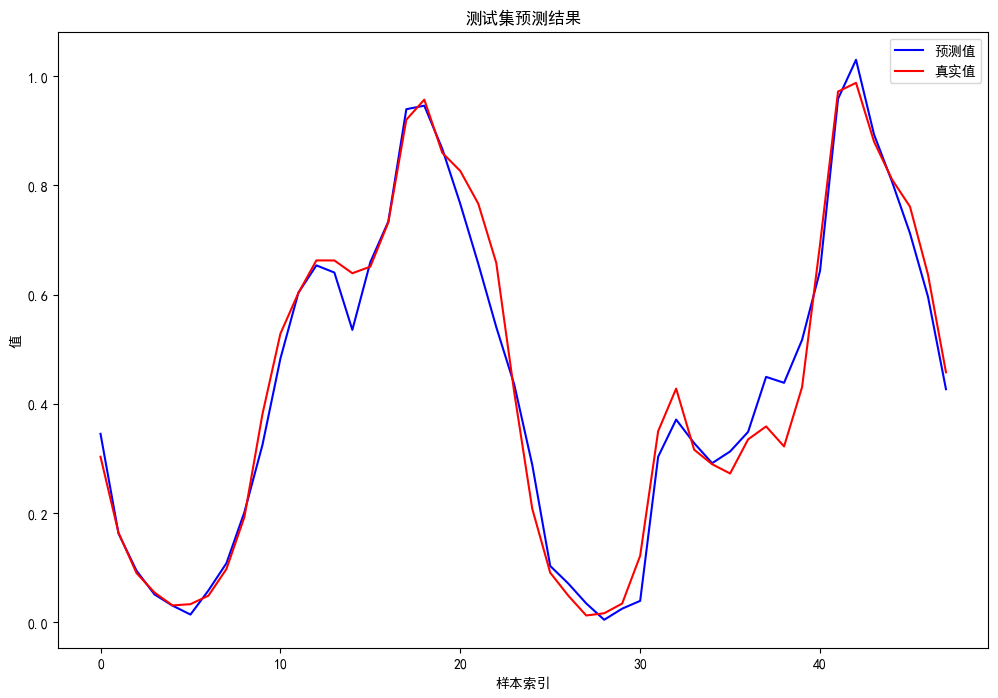

In [67]:

predictions = np.concatenate(predictions,axis=0)
actuals = np.concatenate(actuals,axis=0)

plot_size = 48
plt.figure(figsize=(12, 8))
plt.plot(predictions[:plot_size, 0], "b", label='预测值')
plt.plot(actuals[:plot_size, 0], "r", label='真实值')
plt.legend(loc='best')
plt.title('测试集预测结果')
plt.xlabel('样本索引')
plt.ylabel('值')
plt.show()

In [70]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

R2 = r2_score(actuals,predictions)
MAE = mean_absolute_error(actuals,predictions)
RMSE = np.sqrt(mean_squared_error(actuals,predictions))
MAPE = np.mean(np.abs(actuals-predictions)/predictions)
print('R2:',R2)
print('MAE:',MAE)
print('RMSE:',RMSE)
print('MAPE:',MAPE)

R2: 0.9765020362288769
MAE: 0.033987716
RMSE: 0.045893352
MAPE: 0.16099338
